In [1]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob


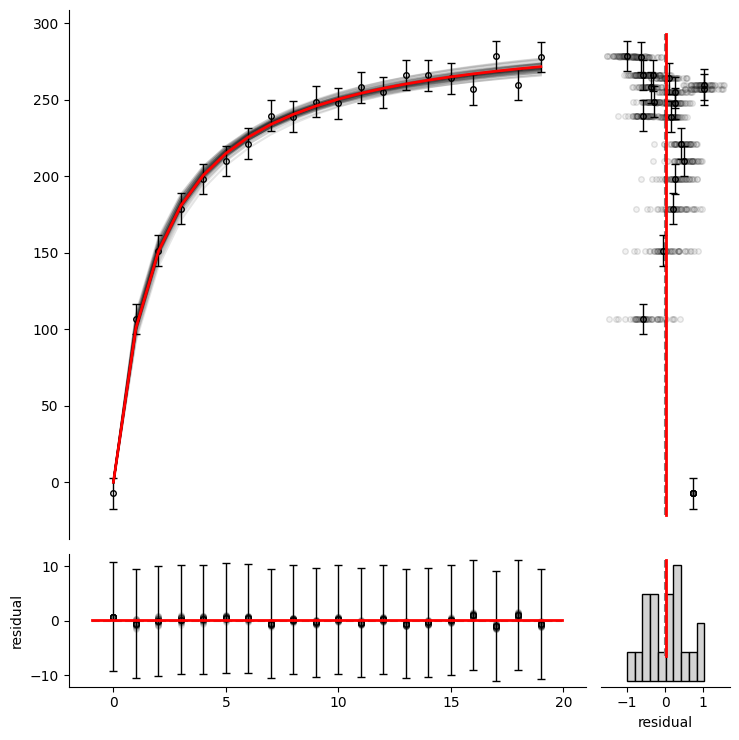

In [2]:
%matplotlib inline
import dataprob
import numpy as np

def michaelis_menten(vmax=100,km=30,s0=None): 
    return s0/(s0 + km)*vmax

gen_params = {"vmax":300,
              "km":10}

err = 5
num_points = 20

s0 = np.linspace(0,100,num_points)
y_obs = michaelis_menten(s0=s0,**gen_params) + np.random.normal(0,err,num_points)
y_std = 2*err

non_fit_kwargs = {"s0":s0}

f = dataprob.setup(some_function=michaelis_menten,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)
f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f)

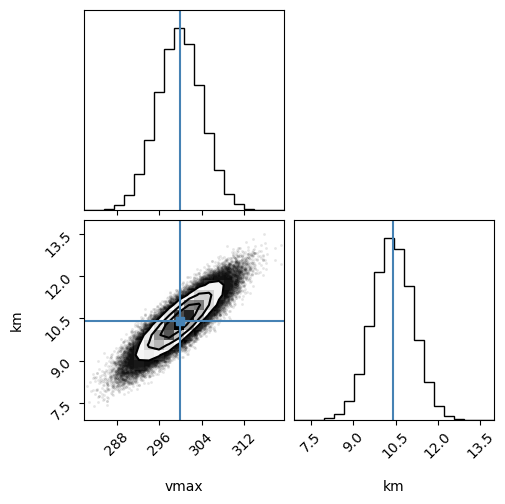

In [3]:
fig = dataprob.plot_corner(f)

In [4]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
vmax,vmax,299.843425,4.195276,290.992166,308.694685,100.0,False,-inf,inf,NaN,NaN
km,km,10.396344,0.715611,8.886537,11.906152,30.0,False,-inf,inf,NaN,NaN
